# PRML Mid-Semester Examination
## Question 1a

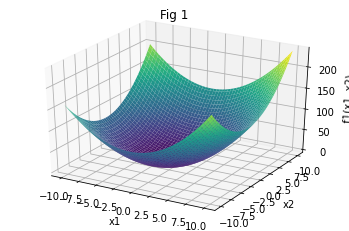

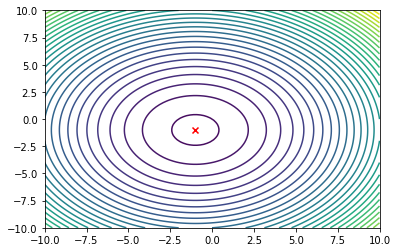

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return (x ** 2) + (y ** 2) + (2 * x) + (2 * y)
	
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f1(x1, x2)')
ax.set_title('Fig 1')
plt.show()

plt.figure()
plt.contour(X, Y, Z, 30)
plt.scatter(-1, -1, c='r', marker='x')
plt.show()

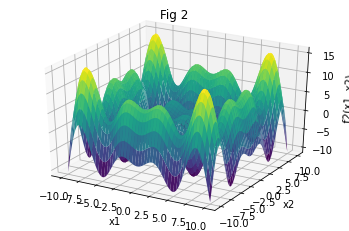

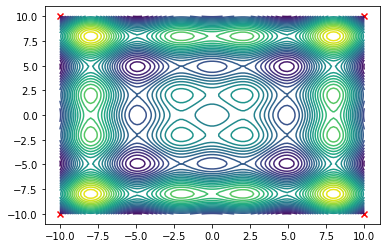

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return (x * np.sin(x)) + (y * np.sin(y))
	
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f2(x1, x2)')
ax.set_title('Fig 2')
plt.show()

plt.figure()
plt.contour(X, Y, Z, 30)
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.scatter(-10, 10, c='r', marker='x')
plt.scatter(-10, -10, c='r', marker='x')
plt.scatter(10, -10, c='r', marker='x')
plt.scatter(10, 10, c='r', marker='x')
plt.show()

In [ ]:
def gradient_descent(x1, x2, grad_func, no_iterations, learning_rate):
  for i in range(no_iterations):
    if (x1 >= -10 or x2 >= -10):
      x1 = x1 - grad_func(x1)*learning_rate
      x2 = x2 - grad_func(x2)*learning_rate
    else:
      break
  print(x1, x2)

In [ ]:
def derivative_f1(x):
  return 2*x + 2

In [ ]:
def derivative_f2(x):
  return x*np.cos(x) + np.sin(x)

In [ ]:
gradient_descent(1, 2, derivative_f1, 1000, 0.1)

-0.9999999999999998 -0.9999999999999998


In [ ]:
gradient_descent(-8, -8, derivative_f2, 1000, 0.01)

-10.002679946223592 -10.002679946223592


# Question 2

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 144MB/s]
100% 66.0M/66.0M [00:00<00:00, 190MB/s]


In [ ]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()

# df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [ ]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13399,23677.0,1.213996,0.381664,0.457732,0.785547,-0.277041,-0.709482,-0.136229,-0.113291,1.122098,-0.472471,2.505312,-1.809938,1.357162,1.428346,-0.297034,0.666559,0.499612,0.522788,-0.108610,-0.137606,-0.390737,-0.939595,0.132380,0.216607,0.148418,0.039816,-0.056630,0.013502,2.99,0
11880,20451.0,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,9.815703,-14.056061,0.777192,-13.761018,-0.353636,-7.957447,-11.962954,-4.780508,0.652498,0.992279,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.00,1
234565,148024.0,-0.993028,0.937070,1.413003,3.050149,-0.718927,0.666020,0.203308,0.534997,-0.843043,0.576214,-1.664906,-0.334499,0.158925,-0.288394,-0.840096,1.615436,-0.989232,0.171452,-1.921708,-0.474202,0.111561,0.278299,0.358673,-0.013209,-0.706717,-0.272870,-0.203125,0.002287,132.75,0
64329,51112.0,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,-6.065782,2.707856,-6.136034,-0.545976,-7.028980,0.916069,-4.092884,-7.014622,-2.530967,0.554027,0.832398,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1
150697,93920.0,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,-4.250657,-16.746044,7.425801,-15.564838,-0.426338,-14.029538,-1.681889,-11.133761,-15.833589,-5.748533,2.271082,0.537795,0.167703,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,97.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,1.168216,-2.134732,1.128313,-4.566010,-0.126950,-2.826986,-2.865750,-0.912934,0.421144,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
42007,40918.0,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,-2.870145,-5.290610,3.823762,-7.492276,-1.524367,-8.527679,-0.391215,-6.180880,-9.698839,-4.818233,-0.871582,0.077781,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,0.76,1
116833,74445.0,-0.750551,-0.165004,0.610902,-2.305588,-0.451675,-0.941444,1.482437,-0.171663,0.520136,-1.695390,0.992996,0.749403,-0.945546,0.488964,-0.542051,-0.687188,-0.247767,0.309097,0.771865,0.265784,0.231302,0.432322,0.158550,0.365624,0.163574,-0.124350,0.019393,0.126137,195.00,0
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


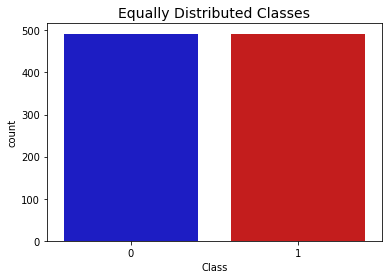

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
# Taking threshold = 2.5

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 2.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 2.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 2.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 13.524755288713797
V14 Lower: -23.21747825368618
V14 Upper: 9.241934439226931
Feature V14 Outliers for Fraud Cases: 0
V10 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -22.973397762880744
V12 Upper: 11.31113321568351
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 984
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -20.61298401449225
V10 Upper: 10.242101873455214
V10 outliers: [-22.1870885620007, -22.1870885620007, -22.1870885620007, -23.2282548357516, -24.5882624372475, -20.949191554361104, -24.403184969972802, -22.1870885620007]
Feature V10 Outlie

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_df['Time'].values.reshape(-1, 1))
new_df['Time'] = scaler.fit_transform(new_df['Time'].values.reshape(-1, 1))
scaler.fit(new_df['Amount'].values.reshape(-1, 1))
new_df['Amount'] = scaler.fit_transform(new_df['Amount'].values.reshape(-1, 1))

In [ ]:
import time
from sklearn.manifold import TSNE

X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 6.6 s


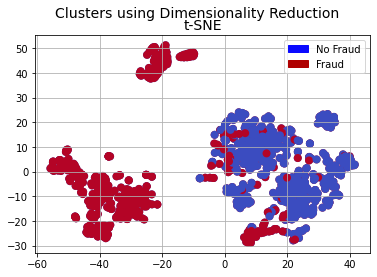

In [ ]:
import matplotlib.patches as mpatches

f, ax1 = plt.subplots(1)
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])
plt.show()